In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

This first mini-project is focused on supervised machine learning. For this mini-project I have selected the Life Expectancy dataset that is publicly available on Kaggle.com. From this dataset, I am most interested in understanding the correlation between the factors chosen and longevity, specifically, I am interested in the relative importance of each of these factors in determining longevity. Given my interest is not primarily prediction, but more the predictive power of each factor on longevity, it is important that the resulting model remain interpretable, even at the expense of predictive accuracy.

The life expectancy dataset is a time series over 15 years, with country data from 178 unique countries. contains health and socioeconomic information on over 178 countries. The features of the dataset include:
- country (qualitative) - the name of the country the record is relevant for
- year (qualitative)  - year that the record was taken
- status (qualitative) - economic status of the country (Developing/ Developed)
- Hepatitis B (quantitative) - percentage of the population that was immunized against Hep B
- Measeles (quantitative) - cases per 1000 people of Measles
- Polio (quantitative) - percentage of the population immunized against Polio
- HIV/AIDs (quantitative) - Deaths caused by HIV/AIDs
- Infant Deaths (quantitative) - number of infant deaths per 1000 people
- under-five deaths (quantitative) - number of deaths of people under 5 years old per 1000 people
- total expenditure (quantitative) - The ratio of government medical-health expenses to total government expenses
- GDP (quantitative) - Gross Domestic Product
- BMI (quantitative) - The average body mass index of the entire population of the country
- thinness (quantitative) - Prevalence of thinness among people 19 years old in percentage
- Alcohol (quantitative) - Liters of alcohol consumption among people over 15 years old
- Schooling (quantitative) - The number of years that people study
- life expectancy (quantitative) - Country life expectancy

There are 2848 total records in the file

In [314]:
df = pd.read_csv('life_expectancy.csv')
df

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
0,Afghanistan,2015,Developing,33736494.0,65.0,1154,6.0,65.0,0.1,62,83,8.16,584.259210,19.1,17.2,0.01,10.1,65.0
1,Afghanistan,2014,Developing,327582.0,62.0,492,58.0,62.0,0.1,64,86,8.18,612.696514,18.6,17.5,0.01,10.0,59.9
2,Afghanistan,2013,Developing,31731688.0,64.0,430,62.0,64.0,0.1,66,89,8.13,631.744976,18.1,17.7,0.01,9.9,59.9
3,Afghanistan,2012,Developing,3696958.0,67.0,2787,67.0,67.0,0.1,69,93,8.52,669.959000,17.6,17.9,0.01,9.8,59.5
4,Afghanistan,2011,Developing,2978599.0,68.0,3013,68.0,68.0,0.1,71,97,7.87,63.537231,17.2,18.2,0.01,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,Zimbabwe,2004,Developing,12777511.0,68.0,31,67.0,65.0,33.6,27,42,7.13,454.366654,27.1,9.4,4.36,9.2,44.3
2844,Zimbabwe,2003,Developing,12633897.0,7.0,998,7.0,68.0,36.7,26,41,6.52,453.351155,26.7,9.8,4.06,9.5,44.5
2845,Zimbabwe,2002,Developing,125525.0,73.0,304,73.0,71.0,39.8,25,40,6.53,57.348340,26.3,1.2,4.43,10.0,44.8
2846,Zimbabwe,2001,Developing,12366165.0,76.0,529,76.0,75.0,42.1,25,39,6.16,548.587312,25.9,1.6,1.72,9.8,45.3


In [315]:
df.describe()

,Year,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
count,2848.000000,2.204000e+03,2306.000000,2848.000000,2829.000000,2829.000000,2848.000000,2848.000000,2848.000000,2627.000000,2406.000000,2816.000000,2816.000000,2660.000000,2688.000000,2848.000000
mean,2007.500000,1.283457e+07,81.076756,2083.082163,82.682220,82.451396,1.756461,28.359902,39.500000,5.935577,7664.398813,38.503374,4.847230,4.638932,12.060156,69.347402
std,4.610582,6.196094e+07,25.019068,10249.107207,23.434954,23.693936,5.148935,117.188032,159.800866,2.504439,14466.241793,19.955485,4.443695,4.064721,3.320160,9.528332
min,2000.000000,3.400000e+01,1.000000,0.000000,3.000000,2.000000,0.100000,0.000000,0.000000,0.370000,1.681350,1.000000,0.100000,0.010000,0.000000,36.300000
25%,2003.750000,1.967585e+05,77.000000,0.000000,78.000000,78.000000,0.100000,0.000000,0.000000,4.240000,477.541713,19.500000,1.600000,0.930000,10.200000,63.500000
50%,2007.500000,1.391756e+06,92.000000,16.000000,93.000000,93.000000,0.100000,3.000000,4.000000,5.760000,1841.086830,43.900000,3.300000,3.785000,12.400000,72.200000
75%,2011.250000,7.438947e+06,97.000000,336.750000,97.000000,97.000000,0.700000,20.000000,25.000000,7.530000,6265.658907,56.200000,7.125000,7.810000,14.300000,75.800000
max,2015.000000,1.293859e+09,99.000000,212183.000000,99.000000,99.000000,50.600000,1800.000000,2500.000000,17.600000,119172.741800,77.600000,27.700000,17.870000,20.700000,89.000000


## Exploratory Data Analysis
In the following, I will go through each feature and perform some initial testing to identify at a high level any relevant insights for each feature.

First, we need to understand how and where there are missing values. Because this is a time series data set, we have the ability to interpolate missing values using an estimator from the existing values. However, before we interpolate, we should consider the distribution of data within each feature, whether it is normalized, and also how many missing values there are and whether those missing values are clustered or normally distributed in the data. There may be some columns from which there is too much data missing for us to realistically impute or interpolate missing values, and for those we will likely populate with the median value from that feature.

Becuase we are drawing inferences from the data, and our primary goal is to determine which factors contribute to Life Expectancy, with a secondary goal of prediction accuracy, we are going to choose a highly interpretable model. Because the response variable "Life expectancy" is quantitative data, we are going to use linear regression as a model to predict Life expectancy based on the feature set. Linear Regression is highly intepretable, and we will be able to look at the coefficient values in the model summary, as well as the p-values to determine the relative strength and impact of the feature on the model.


## First we are going to look at our missing values

In [316]:
#Missing data, first we want to see what data we are missing.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               2848 non-null   object 
 1   Year                  2848 non-null   int64  
 2   Status                2848 non-null   object 
 3   Population            2204 non-null   float64
 4   Hepatitis B           2306 non-null   float64
 5   Measles               2848 non-null   int64  
 6   Polio                 2829 non-null   float64
 7   Diphtheria            2829 non-null   float64
 8   HIV/AIDS              2848 non-null   float64
 9   infant deaths         2848 non-null   int64  
 10  under-five deaths     2848 non-null   int64  
 11  Total expenditure     2627 non-null   float64
 12  GDP                   2406 non-null   float64
 13  BMI                   2816 non-null   float64
 14  thinness  1-19 years  2816 non-null   float64
 15  Alcohol              

Above we have all the features and the number of values missing in each feature. It looks like there are many missing values, specifically in Population where we are missing almost 23% of the data. We also know that Population is not normally distributed, and thus likely to be skewed. For this reason, we will likely drop Population data, especially as the impact on Life Expectancy seems questionable.

In [317]:
df_missing = df.set_index(['Country','Year'])
df_missing = df_missing[df_missing.isna().any(axis=1)]
print(f'{len(df_missing)/len(df)} % of rows are missing data')

0.4434691011235955 % of rows are missing data


It looks like we're missing quite a lot of data, and that almost half of our records are missing one or more values. Let's take a given feature and see how many countries are missing all of their feature data, vs just some of the feature data.

<Axes: xlabel='Country'>

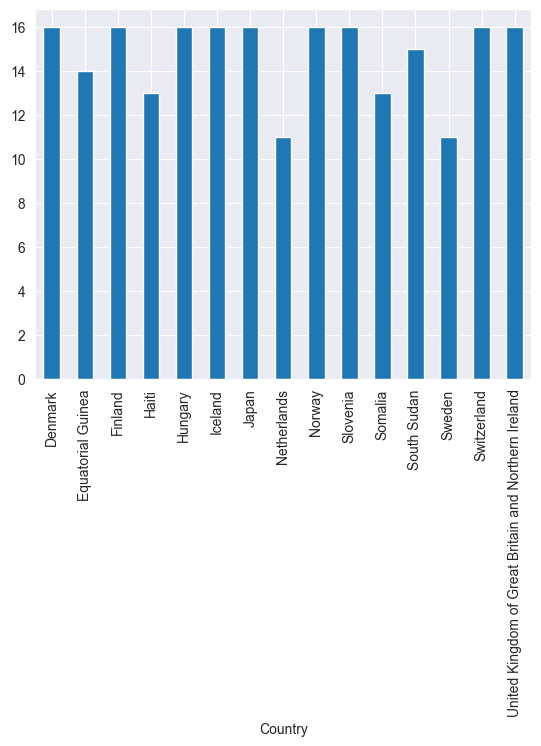

In [318]:
df_missing_hep = df_missing['Hepatitis B']
df_missing_hep_na = df_missing_hep.isna().groupby(level=0).sum()
df_missing_hep_na[df_missing_hep_na > 10].plot(kind='bar')

As we can see above, only a handful of countries are missing all of their 'Hepatitis B' data, which means our interpolation strategy of inferring missing feature values based on previous feature values in the time series is promising.

In [319]:
df_pivot = df.pivot(columns='Year',index='Country')
df_pivot.head()

Status                                       
Year                       2000        2001        2002        2003   
Country                                                               
Afghanistan          Developing  Developing  Developing  Developing  \
Albania              Developing  Developing  Developing  Developing   
Algeria              Developing  Developing  Developing  Developing   
Angola               Developing  Developing  Developing  Developing   
Antigua and Barbuda  Developing  Developing  Developing  Developing   

                                                                      
Year                       2004        2005        2006        2007   
Country                                                               
Afghanistan          Developing  Developing  Developing  Developing  \
Albania              Developing  Developing  Developing  Developing   
Algeria              Developing  Developing  Developing  Developing   
Angola               Developing  Developing  Developing  Developing   
Antigua and Barbuda  Developing  Developing  Developing  Developing   

                                             ... Life expectancy               
Year                       2008        2009  ...            2006  2007  2008   
Country                                      ...                               
Afghanistan          Developing  Developing  ...            57.3  57.5  58.1  \
Albania              Developing  Developing  ...            74.2  75.9  75.3   
Algeria              Developing  Developing  ...            73.4  73.8  74.1   
Angola               Developing  Developing  ...            47.7  48.2  48.7   
Antigua and Barbuda  Developing  Developing  ...            74.8  75.0  75.2   

                                                               
Year                 2009  2010  2011  2012  2013  2014  2015  
Country                                                        
Afghanistan          58.6  58.8  59.2  59.5  59.9  59.9  65.0  
Albania              76.1  76.2  76.6  76.9  77.2  77.5  77.8  
Algeria              74.4  74.7  74.9  75.1  75.3  75.4  75.6  
Angola               49.1  49.6  51.0  56.0  51.1  51.7  52.4  
Antigua and Barbuda  75.4  75.6  75.7  75.9  76.1  76.2  76.4  

[5 rows x 256 columns]

In [320]:
#Proportion of countries for which there is any missing population data.
print(f' {len(df_pivot.loc[df_pivot.Population.isnull().any(axis=1)])/len(df.Country.unique())* 100}% of countries are missing population data')

 23.03370786516854% of countries are missing population data


Below I want to visually represent all of the missing data for Population, just to confirm the sparseness of the data, before dropping it from the table.

/Users/alexcullen/Library/Python/3.10/lib/python/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


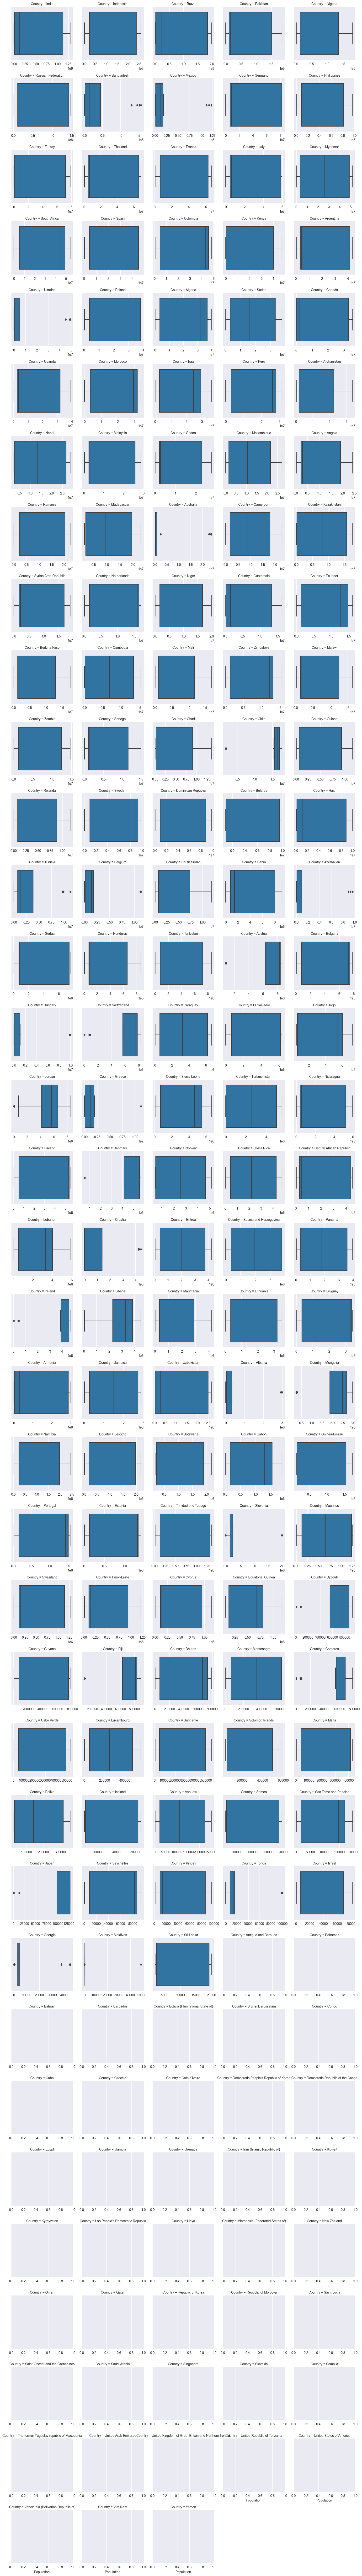

In [321]:
df_pivot = df.pivot(index='Year', columns='Country', values='Population')
std_devs = df_pivot.std().sort_values(ascending=False)

country_order = std_devs.index.tolist()
g = sns.FacetGrid(df, col="Country", col_order=country_order, col_wrap=5, sharex=False)

# Apply a boxplot on each face
g.map(sns.boxplot, "Population")
plt.show()


Not only are there many missing values, we can see from the box plots that there are several outliers in the dataset. The data collected for this feature is poor and may bias our dataset.

The only categorical variable in the dataset is economic Status, which is binary and has a value of either "Developed" or "Developing". We will need to convert this categorical variable into a single dummy variable column with value 1 if the country is "Developed" and 0 otherwise.

Also, looking at the distribution of Status, we can see that every country that was "Developed" at period 0 stayed "Developed" through the last period, and every country that was "Developing" at period 0, remained "Developing" through the last period. This is promising for our interpolation strategy, as the estimator we choose will likely be extremely accurate.

In [322]:
#Economic Status (developing or developed) of each country

df_status = pd.concat([df.drop('Status',axis=1),pd.get_dummies(df.Status)], axis=1)[['Country','Developed']]
df_status.head()

,Country,Developed
0,Afghanistan,False
1,Afghanistan,False
2,Afghanistan,False
3,Afghanistan,False
4,Afghanistan,False


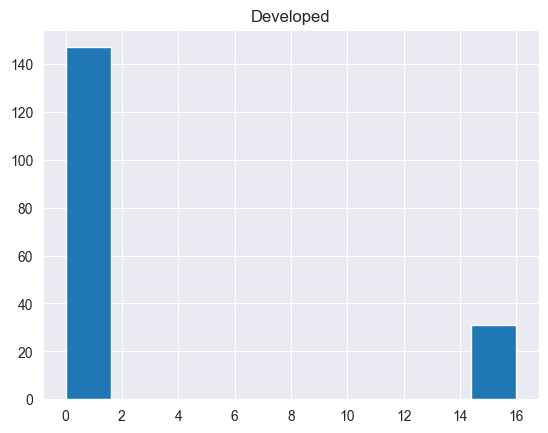

In [323]:
df_status.groupby('Country').sum().hist();

Next we are going to take the mean of each feature value by country, and plot those using a box plot to better understand the distribution of data and whether it is normally distributed.

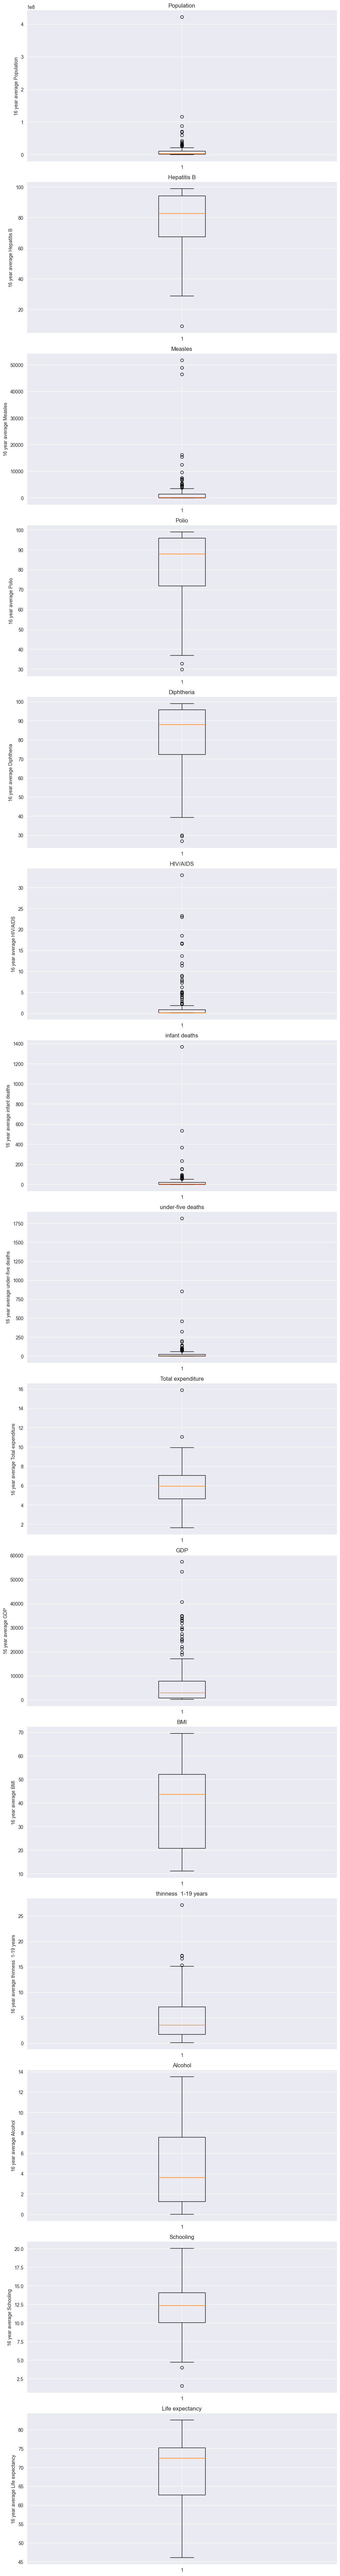

In [324]:
fig, axs = plt.subplots(len(df.drop(['Country', 'Year', 'Status'], axis=1).columns), 1, figsize=(10, 5*len(df.drop(['Country', 'Year', 'Status'], axis=1).columns)))
for idx, col in enumerate(df.drop(['Country', 'Year', 'Status'], axis=1).columns):
    df_pivot = df.pivot(index='Year', columns='Country', values=col)
    means = df_pivot.mean().dropna()
    axs[idx].boxplot(means)
    axs[idx].set_title(col)
    axs[idx].set_ylabel(f'16 year average {col}')
plt.tight_layout()
plt.show()

We can see that many of the features are not normally distributed, like GDP, Total Expenditure, HIV/AIDS, and others. These values we will need to log transform so that they do not skew/bias our model's predictions.

Below we look at the correlation between features, and we can see that infant deaths and under-five deaths are almost 1:1 correlated. This will likely be an interaction that we need to account for in our model. Other features are correlated with each other, for example vaccination rates, but not to a material degree that they must be accomodated for.

<Axes: >

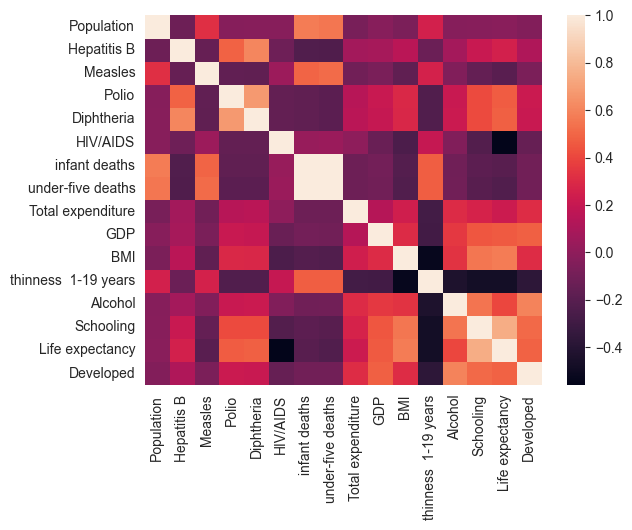

In [325]:
df_status = pd.concat([df.drop('Status',axis=1),pd.get_dummies(df.Status)], axis=1).drop('Developing',axis=1)
sns.heatmap(df_status.set_index(['Year','Country']).corr())

In the following section, we are going to perform the following transformations on the data based on what we learned from EDA above.
1. Convert Status as a categorical variable to a numeric 0/1 binary column
2. Log transform postive numeric columns that are not normally distributed
3. Interpolate missing values in features where possible
4. Impute all remaining missing values.

In [326]:
df_melt = df_status.melt(id_vars=['Year', 'Country'],
                         value_vars=df_status.drop(['Year', 'Country'],axis=1).columns,
                        var_name='Feature',
                        value_name='Value')

df_pivot = df_melt.pivot_table(index='Year',
                               columns=['Country', 'Feature'],
                               values='Value')
df_pivot

Country Afghanistan                                                   
Feature     Alcohol   BMI Developed Diphtheria         GDP HIV/AIDS   
Year                                                                  
2000           0.01  12.2       0.0       24.0      114.56      0.1  \
2001           0.01  12.6       0.0       33.0   117.49698      0.1   
2002           0.01  13.0       0.0       36.0   187.84595      0.1   
2003           0.01  13.4       0.0       41.0  198.728544      0.1   
2004           0.02  13.8       0.0        5.0  219.141353      0.1   
2005           0.02  14.2       0.0       58.0    25.29413      0.1   
2006           0.03  14.7       0.0       58.0   272.56377      0.1   
2007           0.02  15.2       0.0       63.0  369.835796      0.1   
2008           0.03  15.7       0.0       64.0  373.361116      0.1   
2009           0.01  16.2       0.0       63.0  445.893298      0.1   
2010           0.01  16.7       0.0       66.0   553.32894      0.1   
2011           0.01  17.2       0.0       68.0   63.537231      0.1   
2012           0.01  17.6       0.0       67.0     669.959      0.1   
2013           0.01  18.1       0.0       64.0  631.744976      0.1   
2014           0.01  18.6       0.0       62.0  612.696514      0.1   
2015           0.01  19.1       0.0       65.0   584.25921      0.1   

Country                                            ...    Zimbabwe   
Feature Hepatitis B Life expectancy Measles Polio  ... Hepatitis B   
Year                                               ...               
2000           62.0            54.8  6532.0  24.0  ...        79.0  \
2001           63.0            55.3  8762.0  35.0  ...        76.0   
2002           64.0            56.2  2486.0  36.0  ...        73.0   
2003           65.0            56.7   798.0  41.0  ...         7.0   
2004           67.0            57.0   466.0   5.0  ...        68.0   
2005           66.0            57.3  1296.0  58.0  ...        65.0   
2006           64.0            57.3  1990.0  58.0  ...        68.0   
2007           63.0            57.5  1141.0  63.0  ...        72.0   
2008           64.0            58.1  1599.0  64.0  ...        75.0   
2009           63.0            58.6  2861.0  63.0  ...        73.0   
2010           66.0            58.8  1989.0  66.0  ...         9.0   
2011           68.0            59.2  3013.0  68.0  ...        94.0   
2012           67.0            59.5  2787.0  67.0  ...        97.0   
2013           64.0            59.9   430.0  62.0  ...        95.0   
2014           62.0            59.9   492.0  58.0  ...        91.0   
2015           65.0            65.0  1154.0   6.0  ...        87.0   

Country                                                                         
Feature Life expectancy Measles Polio  Population Schooling Total expenditure   
Year                                                                            
2000               46.0  1483.0  78.0  12222251.0       9.8               7.1  \
2001               45.3   529.0  76.0  12366165.0       9.8              6.16   
2002               44.8   304.0  73.0    125525.0      10.0              6.53   
2003               44.5   998.0   7.0  12633897.0       9.5              6.52   
2004               44.3    31.0  67.0  12777511.0       9.2              7.13   
2005               44.6   420.0  69.0    129432.0       9.3              6.44   
2006               45.4   212.0  71.0  13124267.0       9.5              5.12   
2007               46.6   242.0  73.0   1332999.0       9.6              4.47   
2008               48.2     0.0  75.0  13558469.0       9.7              4.96   
2009               50.0   853.0  69.0   1381599.0       9.9              6.26   
2010               52.4  9696.0  89.0   1486317.0      10.0              5.37   
2011               54.9     0.0  93.0  14386649.0      10.1              6.31   
2012               56.6     0.0  95.0   1471826.0       9.8              6.69   
2013               58.0

In this section we are removing all outlier values by country by feature. For example, we look at a given country's rates of vaccination for Hep B, and we remove any extreme (3 std deviations) outliers in Hep B based on the existing data for that country. There are many outlier values in the data set. We will interpolate or impute the missing values that we are removing from the dataset.

In [327]:
threshold = 3

def calculate_z_scores(col):
    if col.std() == 0:
        return [np.nan] * len(col)
    else:
        return (col - col.mean()) / col.std()

z_scores = df_pivot.apply(calculate_z_scores, axis=0)

outliers = np.abs(z_scores) > threshold

df_pivot[outliers] = np.nan

In [328]:
df_pre_impute = df_pivot.copy()

In [329]:
df_stacked = df_pre_impute.stack(level=0)

df_reset = df_stacked.reset_index()


Number of missing values

In [330]:
df_reset.isna().sum().sum()

2612

We will use a complex KNN Imputer in order to impute the remaining missing values. This is preferred over a more simple approach because it is likely that there is a high degree of clustering in the dataset. The initial "Status" column is an indication that factors amongst the group of developing or developed nations are dissimilar from each other, but similar within their class.

In [331]:
for col in df_reset.drop('Country',axis =1).columns:
    df_reset[col] = pd.to_numeric(df_reset[col])

numeric_columns = df_reset.select_dtypes(include=[np.number])

imputer = KNNImputer(n_neighbors=5)

df_imputed_numeric = imputer.fit_transform(numeric_columns)

df_imputed_numeric = pd.DataFrame(df_imputed_numeric, columns=numeric_columns.columns)

df_imputed = pd.concat([df_reset.drop(numeric_columns.columns, axis=1), df_imputed_numeric], axis=1)


Here we are log transforming the non-normally distributed columns

In [332]:
df_transformed = df_imputed.copy()

log_transform_cols = ['GDP', 'Total expenditure', 'under-five deaths', 'infant deaths', 'Measles', 'HIV/AIDS']

for col in log_transform_cols:
    df_transformed[col] = df_transformed[col].apply(lambda x: np.log(x+ 1))

In [333]:
df_transformed

Feature,Country,Year,Alcohol,BMI,Developed,Diphtheria,GDP,HIV/AIDS,Hepatitis B,Life expectancy,Measles,Polio,Population,Schooling,Total expenditure,infant deaths,thinness 1-19 years,under-five deaths
0,Afghanistan,2000.0,0.010,12.2,0.0,24.0,4.749790,0.095310,62.0,54.8,8.784622,24.0,2.937560e+05,5.5,2.219203,4.488636,2.3,4.812184
1,Albania,2000.0,3.660,45.0,0.0,97.0,7.070545,0.095310,96.0,72.6,2.104134,97.0,3.892700e+04,10.7,1.982380,0.693147,2.1,0.693147
2,Algeria,2000.0,0.250,44.4,0.0,86.0,7.472033,0.095310,86.0,71.3,0.000000,86.0,3.118366e+06,10.7,1.501853,3.091042,6.5,3.258097
3,Angola,2000.0,1.850,15.4,0.0,28.0,6.321302,1.098612,69.0,45.3,7.705262,3.0,1.644924e+06,4.6,1.332366,4.584967,1.9,5.081404
4,Antigua and Barbuda,2000.0,7.270,38.2,0.0,95.0,9.197879,0.095310,96.4,73.6,0.000000,96.0,1.058848e+07,0.0,1.635106,0.000000,3.7,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,Venezuela (Bolivarian Republic of),2015.0,5.784,62.1,0.0,87.0,7.947697,0.095310,87.0,74.1,0.000000,87.0,2.258149e+07,14.3,1.926873,2.302585,1.6,2.397895
2844,Viet Nam,2015.0,1.248,17.5,0.0,97.0,6.280968,0.095310,97.0,76.0,5.549076,97.0,2.354233e+06,12.6,1.746762,3.367296,14.2,3.583519
2845,Yemen,2015.0,2.444,41.3,0.0,69.0,8.116740,0.095310,69.0,65.7,6.150603,63.0,1.281210e+07,9.0,1.781036,3.637586,13.6,3.871201
2846,Zambia,2015.0,3.048,23.4,0.0,9.0,7.181508,1.629241,9.0,61.8,2.302585,9.0,1.615870e+05,12.5,1.796083,3.332205,6.3,3.713572


Now that all of the data is cleaning and transformed, we will run a simple OLS linear regrssion using Statsmodel as our baseline to see how a normal linear regression model performs.

In [334]:
df_final = df_transformed.set_index(['Year', 'Country']).drop('Population',axis=1)
X = df_final.drop('Life expectancy', axis=1)
y = df_final['Life expectancy']

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(y_train, X_train)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     897.8
Date:                Mon, 03 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:22:55   Log-Likelihood:                -6218.5
No. Observations:                2278   AIC:                         1.247e+04
Df Residuals:                    2263   BIC:                         1.255e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   54.3579 

We can see from the summary table that Simple Linear Regression is actaully quite effective at modeling the data. The adj R-squared for our model is 84.6% which means that our model explains 84.6% of the variance in the errors.

Looking at each parameter and the assessment, we can see based on the coefficient and p-value of each the relevance and impact of each parameter on the model.  Immediately we can see that Total Expenditure on healthcare is above our p-value threshold of .05, as well as # of cases of measles. We can see that infant deaths and under-five deaths are extremely correlated with each other, and so we will need to include that interaction in our model.

From first review, it seems that HIV/AIDS is the strongest predictor of life expectancy, followed by whether or not the country is "Developed".

In [335]:
y_pred = results.predict(X_test)

mean_squared_error(y_test, y_pred) #baseline score

13.256831860025624

To better analyze multicollinearity, we will use VIF below. We note that infant deaths and under-five deaths are highly correlated.

In [336]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                 feature         VIF
0                  const   99.328038
1                Alcohol    1.985335
2                    BMI    1.919887
3              Developed    1.822120
4             Diphtheria    2.472871
5                    GDP    1.701669
6               HIV/AIDS    1.585255
7            Hepatitis B    1.629814
8                Measles    1.824198
9                  Polio    2.145212
10             Schooling    2.752249
11     Total expenditure    1.141331
12         infant deaths  145.658011
13  thinness  1-19 years    1.775081
14     under-five deaths  153.457055


Here we are creating the interaction between infant deaths and under-five deaths

In [337]:
df_forward_select = df_final.copy()

df_forward_select['infant death * under-five deaths'] = df_forward_select['infant deaths'] * df_forward_select['under-five deaths']

We split the data to validate the accuracy of our predictions on unseen data.

In [338]:
X = df_forward_select.drop('Life expectancy', axis=1)
y = df_forward_select['Life expectancy']

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Below we are going to implement the hybrid approach of forward selecting and backwards selecting features in each iteration of the loop until our model settles and we are no longer adding features. Each forward step we are adding the feature which improves the mean_squared_error the most, each backward step we are removing any features with p-values > our threshold.

In [339]:
def get_score(X_train, X_test, y_train, y_test):
    model = sm.OLS(y_train, add_constant(X_train))
    results = model.fit()
    y_pred = results.predict(add_constant(X_test))
    return mean_squared_error(y_test, y_pred)

remaining = set(X_train.columns)
selected = []
n = len(X_train)
best_new_score, current_score = float('inf'), float('inf')
while remaining:
    changed = False

    # Forward step
    scores_with_candidates = []
    for candidate in remaining:
        temp_selected = selected + [candidate]
        score = get_score(X_train[temp_selected], X_test[temp_selected], y_train, y_test)
        scores_with_candidates.append((score, candidate))

    scores_with_candidates.sort()
    best_new_score, best_candidate = scores_with_candidates[0]

    if best_new_score < current_score:
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        current_score = best_new_score
        changed = True

    # Backward step
    model = sm.OLS(y_train, add_constant(X_train[selected]))
    pvalues = model.fit().pvalues[1:]  # exclude intercept
    worst_pval = pvalues.max()
    if worst_pval > 0.05:
        worst_feature = pvalues.idxmax()
        selected.remove(worst_feature)
        remaining.add(worst_feature)
        changed = True

    if not changed:
        break

best_model = sm.OLS(y_train, add_constant(X_train[selected]))
results = best_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1246.
Date:                Mon, 03 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:22:56   Log-Likelihood:                -6228.6
No. Observations:                2278   AIC:                         1.248e+04
Df Residuals:                    2267   BIC:                         1.254e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   55.5427 

In [340]:
print(f'Final score = {mean_squared_error(y_test, results.predict(add_constant(X_test[selected])))}')
print(f'Selected attributes ranked in order of adj. r-squared ')
[col for col in selected]

Final score = 13.154045372207346
Selected attributes ranked in order of adj. r-squared 


['HIV/AIDS',
 'Schooling',
 'GDP',
 'under-five deaths',
 'Polio',
 'Developed',
 'infant deaths',
 'Diphtheria',
 'Hepatitis B',
 'thinness  1-19 years']

# Final Analysis:

Based on our modeling, it is clear that the most immediate predictor of a country's Life Expectancy is it's incidence of HIV/AIDS, which is a deadly and serious disease. The correlation is strongly negative which means that the higher the prevelance the lower the Life Expectancy of that country.

After that, we see that metrics related to wealth like Schooling, GDP, and Status are positively correlated with Life Expectancy, which is not unusual. However, what is unusual is that Total expenditure on health care does not at all have predictive power on life expectancy.

Linear Regression was a very effective model for the analysis that we were performing today. It is surprising to see how accurate our model was, with our best performing model able to predict a given country's life expectancy with a root mean squared error of 4 years, which is a highly accurate measurement given the range of Life expectancies seen in the data.

Also, with Linear Regression we did not compromise on interpretability, we were readily able to infer from the data which factors were most important in predicting Life Expectancy by country

In [354]:
#As a final step, we will look at the relative performance of KNN which is more difficult to interpret, but might be more accurate at predicting life expectancy.

In [341]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mean_squared_error(y_test, y_pred)

15.671372553606236

In [356]:
X_train.loc[2000.0]

,const,Alcohol,BMI,Developed,Diphtheria,GDP,HIV/AIDS,Hepatitis B,Measles,Polio,Schooling,Total expenditure,infant deaths,thinness 1-19 years,under-five deaths,infant death * under-five deaths
Country,,,,,,,,,,,,,,,,
Timor-Leste,1.0,0.50,11.9,0.0,93.6,6.048049,0.095310,94.6,0.000000,90.8,7.68,1.449269,1.386294,12.2,1.609438,2.231155
Mauritius,1.0,4.60,25.3,0.0,88.0,8.259024,0.095310,88.0,0.000000,88.0,12.10,1.564441,0.000000,8.1,0.000000,0.000000
Gambia,1.0,2.18,18.0,0.0,85.6,5.088505,1.098612,91.0,5.519860,84.0,6.50,1.528228,1.386294,1.2,1.945910,2.697604
Hungary,1.0,12.22,56.1,1.0,99.0,8.439116,0.095310,83.2,0.693147,99.0,13.90,2.151762,0.693147,2.3,0.693147,0.480453
Israel,1.0,2.53,58.3,0.0,93.0,7.674684,0.095310,98.0,3.610918,93.0,15.20,2.095561,0.693147,1.1,0.693147,0.480453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guinea,1.0,0.17,16.6,0.0,46.0,3.570009,1.386294,36.2,9.067809,47.0,4.80,1.495149,3.637586,1.3,4.110874,14.953658
Tunisia,1.0,1.21,48.1,0.0,97.0,7.702969,0.095310,94.0,3.871201,97.0,12.80,1.856298,1.609438,6.6,1.791759,2.883726
Comoros,1.0,0.09,17.3,0.0,7.0,5.931855,0.095310,65.8,0.000000,7.0,8.20,1.517323,0.693147,7.9,1.098612,0.761500


In [379]:
X_test.head()

,,const,Alcohol,BMI,Developed,Diphtheria,GDP,HIV/AIDS,Hepatitis B,Measles,Polio,Schooling,Total expenditure,infant deaths,thinness 1-19 years,under-five deaths,infant death * under-five deaths
Year,Country,,,,,,,,,,,,,,,,
2008.0,Switzerland,1.0,10.29,54.6,1.0,95.0,11.186095,0.095310,98.0,7.612337,96.0,15.3,0.828552,0.000000,0.5,0.000000,0.000000
2001.0,Spain,1.0,9.86,58.2,1.0,96.0,9.637215,0.095310,83.0,0.000000,95.0,15.7,2.109000,1.098612,0.6,1.098612,1.206949
2011.0,Ukraine,1.0,8.48,59.0,0.0,5.0,8.180533,0.182322,21.0,7.195937,54.0,14.9,2.076938,1.791759,2.4,1.791759,3.210402
2014.0,Brazil,1.0,7.32,55.3,0.0,93.0,7.112830,0.095310,96.0,5.564520,96.0,15.2,2.232163,3.806662,2.7,3.912023,14.891751
2012.0,Cyprus,1.0,10.55,58.7,1.0,99.0,10.273400,0.095310,96.0,0.693147,99.0,13.8,2.132982,0.000000,0.9,0.000000,0.000000


In [383]:
distances, indices = model.kneighbors(X=pd.DataFrame(X_test.loc[2008.0].loc['Switzerland']).T)

In [385]:
print(distances)
X_test.iloc[indices[0]]

[[1.86587358 2.40112778 3.79775239]]


,,const,Alcohol,BMI,Developed,Diphtheria,GDP,HIV/AIDS,Hepatitis B,Measles,Polio,Schooling,Total expenditure,infant deaths,thinness 1-19 years,under-five deaths,infant death * under-five deaths
Year,Country,,,,,,,,,,,,,,,,
2005.0,Ireland,1.0,13.31,55.1,1.0,96.0,8.680642,0.095310,98.4,4.564348,96.8,17.5,2.112635,0.000000,0.3,0.000000,0.000000
2003.0,Israel,1.0,2.32,59.6,0.0,93.0,9.849454,0.095310,98.0,4.828314,93.0,16.0,2.132982,0.693147,1.1,0.693147,0.480453
2004.0,Senegal,1.0,0.35,19.1,0.0,87.0,6.599301,0.530628,76.0,3.465736,87.0,6.2,1.899118,3.218876,11.6,3.761200,12.106836


In [382]:
y_test.iloc[indices[0]]

Year    Country
2005.0  Ireland    78.7
2003.0  Israel     79.7
2004.0  Senegal    59.7
Name: Life expectancy, dtype: float64

Above we performed KNN on the same transformed and cleaned dataset, and we achieved a lower accuracy score than even the baseline Linear Regression model. We can also see that when use KNN to return the nearest neighbors, we get some non-intuitive results upon further analysis. For example, 2008 Switzerland's nearest neighbors are Ireland and Israel which make sense, but then Senegal is the third closest, however, as we can see from the data, the Life Expectancy of the Senegalese is far below Switzerland's own.